<h3>https://www.nhc.noaa.gov/data/#hurdat</h3>

The NHC publishes the tropical cyclone historical database in a format known as HURDAT, short for HURricane DATabase. These databases (Atlantic HURDAT2 and NE/NC Pacific HURDAT2) contain six-hourly information on the location, maximum winds, central pressure, and (starting in 2004) size of all known tropical cyclones and subtropical cyclones.


<h2>Pre-processing</h2>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

In [113]:
df = pd.read_csv('atlantic.csv')

In [114]:
df.shape

(49105, 22)

In [115]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [116]:
df = df.drop(columns = ['ID' , 'Event'])

In [117]:
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')

In [118]:
df.head()

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [119]:
# Change all time to format HHMM.
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t

df['Time'] = df['Time'].apply(hhmm)

In [120]:
df['Time']=pd.to_datetime(df['Time'] , format='%H%M%S').dt.time

In [121]:
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Year'] = df['Date'].apply(lambda x: x.year)

#Scientists consider the HURDAT2 record to be accurate for landfall statistics from 1900 onward
df=df[df.Year >=1900]

In [122]:
#missing values are represented by -999, fill missing values with Mean
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
        #print('in ' , column)
        mean = round(df[column][df[column] != -999 ].mean())
        #print("mean",mean)
        index = df.loc[df[column] == -999 , column].index
        #print("index" , index )
        df.loc[df[column] == -999 , column] = mean
        #print(df.loc[index , column])

Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  21604
Missing Values in column Low Wind NE =  33956
Missing Values in column Low Wind SE =  33956
Missing Values in column Low Wind SW =  33956
Missing Values in column Low Wind NW =  33956
Missing Values in column Moderate Wind NE =  33956
Missing Values in column Moderate Wind SE =  33956
Missing Values in column Moderate Wind SW =  33956
Missing Values in column Moderate Wind NW =  33956
Missing Values in column High Wind NE =  33956
Missing Values in column High Wind SE =  33956
Missing Values in column High Wind SW =  33956
Missing Values in column High Wind NW =  33956
Missing Values in column Month =  0
Missing Values in column Year =  0


In [123]:
df.shape

(39877, 22)

In [124]:
# Convert the latitude and longitude Column to numeric type.
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

<h2>EDA</h2>

In [125]:
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)

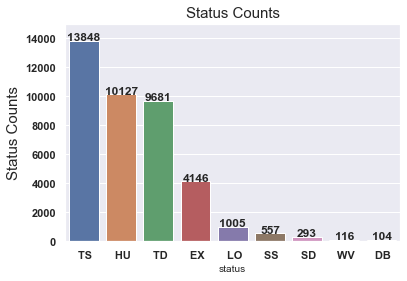

In [126]:
sns.set_theme(style="darkgrid")

status_count=sns.countplot(x='Status',data=df,order=df['Status'].value_counts().index)
status_count.set_xticklabels(status_count.get_xticklabels())
status_count.axes.set_ylim(0,15000)
status_count.axes.set_title("Status Counts",fontsize=15)
status_count.set_xlabel("status",fontsize=10)
status_count.set_ylabel("Status Counts",fontsize=15)

for p in status_count.patches:
    height = p.get_height()
    status_count.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [127]:
#other=['LO','SS','SD','WV','DB']
Status=[]
for i in df['Status']:
    if i in [' LO',' SS',' SD',' WV',' DB']:
        i='oth'
    
    else:
        i
    Status.append(i)

In [128]:
x = np.array(Status)
print(np.unique(x))

[' EX' ' HU' ' TD' ' TS' 'oth']


In [129]:
df['Status']=Status

In [130]:
np.unique(df['Status'])

array([' EX', ' HU', ' TD', ' TS', 'oth'], dtype=object)

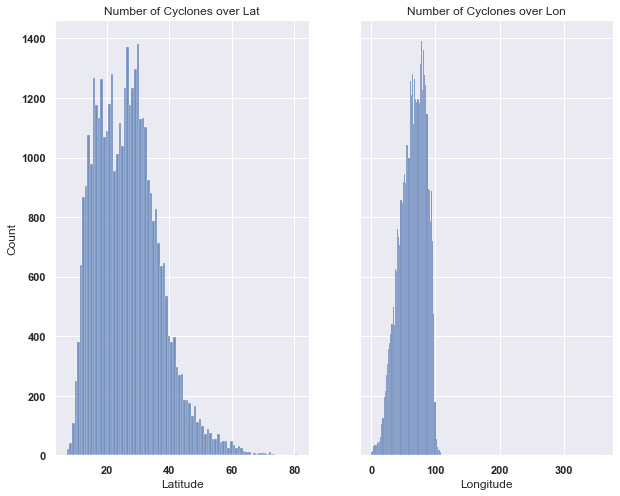

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10,8))
sns.histplot(df['Latitude'].astype('float'), ax=ax1)
ax1.set_title('Number of Cyclones over Lat')
sns.histplot(df['Longitude'].astype('float'), ax=ax2)
ax2.set_title('Number of Cyclones over Lon');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


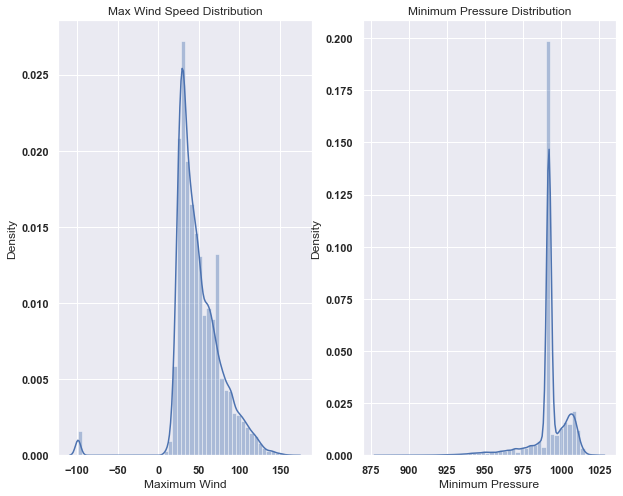

In [132]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(10,8))
sns.distplot(df['Maximum Wind'],ax=ax1)
ax1.set_title('Max Wind Speed Distribution')
sns.distplot(df['Minimum Pressure'],ax=ax2)
ax2.set_title('Minimum Pressure Distribution');

In [133]:
month = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']

In [134]:
df_plot = df.groupby(['Status', 'Month']).size().reset_index().pivot(columns='Status', index='Month', values=0)

In [135]:
df_plot=df_plot.fillna(0)

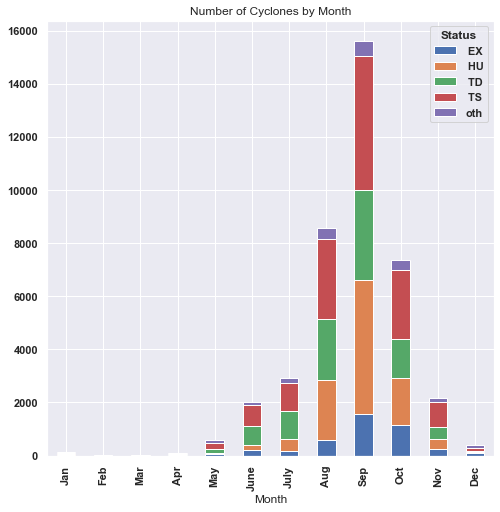

In [136]:
sns.set_theme(style="darkgrid")

ax=df_plot.plot(kind='bar', stacked=True,figsize = (8,8))
ax.set_xticklabels(month, rotation=90)
ax.set_title("Number of Cyclones by Month");

Text(0.5, 1.0, 'Number of Cyclones by Month')

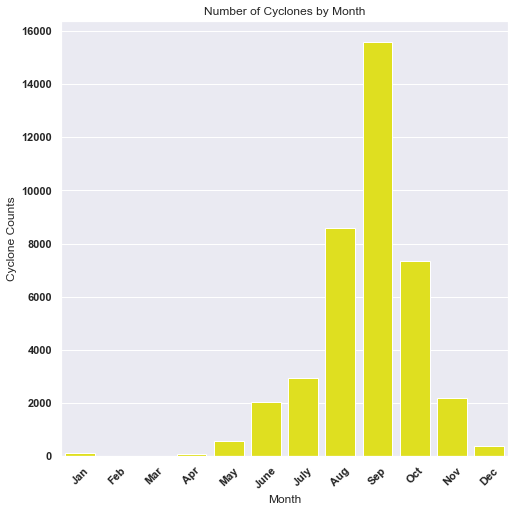

In [137]:
freq = df.groupby('Month')['Status'].count()
freq=pd.DataFrame(freq)#,columns=[['Month','Number']])

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.figure(figsize = (8,8))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=freq.index, y=freq.Status , color='Yellow' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , month , rotation = 45)
plt.ylabel('Cyclone Counts')
plt.title('Number of Cyclones by Month')

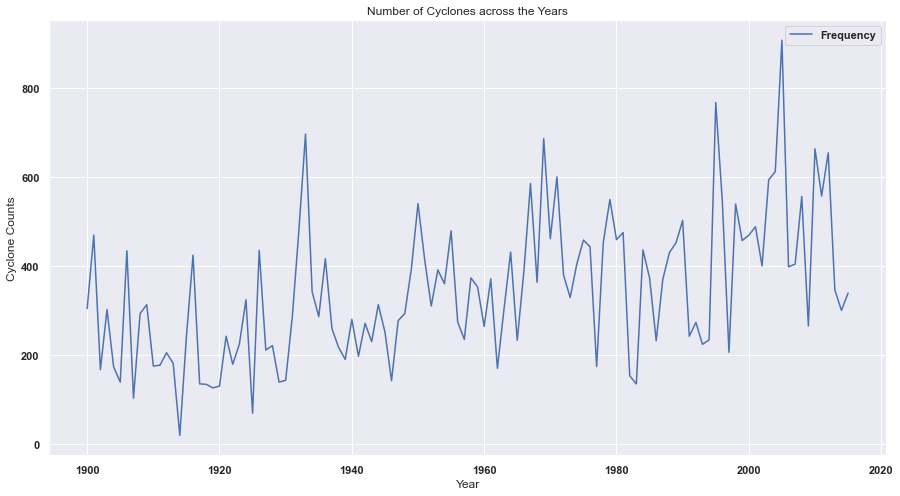

In [138]:
freq = df.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (15,8))
sns.lineplot(x = freq.index , y = 'Month' , data = freq , label = 'Frequency')
plt.ylabel('Cyclone Counts')
plt.title('Number of Cyclones across the Years')
plt.show()

<h2>KNN</h2>

In [139]:
from sklearn.preprocessing import LabelEncoder

#y = df['Status']

#le = LabelEncoder()

#le.fit(y)
#df.loc[:,'Status'] = le.transform(y)
#print(le.classes_)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction import text
from sklearn import metrics

In [141]:
df.dtypes

Name                        object
Date                datetime64[ns]
Time                        object
Status                      object
Latitude                    object
Longitude                   object
Maximum Wind                 int64
Minimum Pressure             int64
Low Wind NE                  int64
Low Wind SE                  int64
Low Wind SW                  int64
Low Wind NW                  int64
Moderate Wind NE             int64
Moderate Wind SE             int64
Moderate Wind SW             int64
Moderate Wind NW             int64
High Wind NE                 int64
High Wind SE                 int64
High Wind SW                 int64
High Wind NW                 int64
Month                        int64
Year                         int64
dtype: object

In [142]:
X =  df.drop(columns = ['Name' ,'Date','Time','Status'])
y = df['Status']

In [143]:
# stratify y just in case 
# test_size : default = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [144]:
y_train.value_counts(normalize=True)

 TS    0.347277
 HU    0.253954
 TD    0.242786
 EX    0.103956
oth    0.052028
Name: Status, dtype: float64

In [145]:
y_test.value_counts(normalize=True)

 TS    0.347242
 HU    0.253962
 TD    0.242728
 EX    0.104012
oth    0.052056
Name: Status, dtype: float64

In [146]:
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

knn=KNeighborsClassifier()

In [147]:
knn=knn.fit(X_train_sc,y_train)

In [148]:
y_predictions=knn.predict(X_test_sc)

In [149]:
#what to expect from the model 
print("Cross Validation Score: {:.5f}".format(cross_val_score(knn,X_train_sc,y_train,cv=10).mean()))

print('train score: {:.5f}'.format(knn.score(X_train_sc,y_train)))
print('test score:{:.5f}' .format(knn.score(X_test_sc,y_test)))


# Model Accuracy, how often is the classifier correct?
print('Accuracy:{:.5f}'.format(metrics.accuracy_score(y_true = y_test, y_pred = y_predictions)))

Cross Validation Score: 0.90290
train score: 0.94714
test score:0.90371
Accuracy:0.90371


In [150]:
preds = knn.predict(X_test)

# Setting knn_misclass_df as a dataframe using data as y_test
knn_mispred_df = pd.DataFrame(data = y_test)

knn_mispred_df = knn_mispred_df.rename({'Status' : 'actual_Status'}, axis = 1)

# Setting predicted_subreddit as preds
knn_mispred_df['predicted_Status'] = preds

knn_mispred_df['mispred'] = (knn_mispred_df['predicted_Status']!=knn_mispred_df['actual_Status'] )


In [151]:
df.loc[knn_mispred_df.index]

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Month,Year
34091,UNNAMED,1980-11-17,06:00:00,TD,25.2,83.2,30,992,82,77,...,25,23,15,18,8,7,5,6,11,1980
26948,ETHEL,1964-09-04,18:00:00,TS,18.4,38.4,35,992,82,77,...,25,23,15,18,8,7,5,6,9,1964
26189,HATTIE,1961-10-31,00:00:00,HU,17.9,86.1,140,920,82,77,...,25,23,15,18,8,7,5,6,10,1961
25408,GRACIE,1959-09-23,18:00:00,TS,25.4,74.0,60,992,82,77,...,25,23,15,18,8,7,5,6,9,1959
31300,BECKY,1974-08-31,06:00:00,HU,40.0,58.0,100,992,82,77,...,25,23,15,18,8,7,5,6,8,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39991,CLAUDETTE,1997-07-13,06:00:00,TD,31.3,73.3,25,1011,82,77,...,25,23,15,18,8,7,5,6,7,1997
19145,UNNAMED,1939-09-23,18:00:00,TS,20.0,93.7,35,992,82,77,...,25,23,15,18,8,7,5,6,9,1939
46143,FRED,2009-09-18,12:00:00,oth,25.6,66.0,25,1012,0,0,...,0,0,0,0,0,0,0,0,9,2009
17716,UNNAMED,1934-09-18,06:00:00,TS,17.7,62.1,45,992,82,77,...,25,23,15,18,8,7,5,6,9,1934


<h2>Decision Tree </h2>

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.tree import DecisionTreeClassifier

In [153]:
X =  df.drop(columns = ['Name' , 'Date','Time','Status'])
y = df['Status']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [155]:
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

In [156]:
#Create a Classifier and fit the model
#set max_depth to avoid a fulling growing crazy tree
Status_classifier = DecisionTreeClassifier(max_depth = 5, random_state=42).fit(X_train_sc, y_train)

In [157]:
#Train the model using the training sets y_pred=rf.predict(X_test)
y_predictions = Status_classifier.predict(X_test_sc)

In [158]:
#What to expect from the model
print("Cross Validation Score:", cross_val_score(Status_classifier,X_train_sc,y_train,cv=10).mean())

print('train score:' ,Status_classifier.score(X_train_sc,y_train))
print('test score:' ,Status_classifier.score(X_test_sc,y_test))

# Model Accuracy, how often is the classifier correct?
print('Accuracy:' ,metrics.accuracy_score(y_true = y_test, y_pred = y_predictions))

#increasing number of nodes could improve performance 

Cross Validation Score: 0.9044706024427798
train score: 0.9073126692747517
test score: 0.9013039117352056
Accuracy: 0.9013039117352056


<h3>Optimizing Decision Tree Performance</h3>

In [159]:
X =  df.drop(columns = ['Name' , 'Date','Time','Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

# Create Decision Tree classifer object and fit the model
Status_classifier_2 = DecisionTreeClassifier(criterion="entropy", max_depth=5,random_state=42).fit(X_train_sc,y_train)

#Predict the response for test dataset
y_predictions = Status_classifier_2.predict(X_test_sc)

print("Cross Validation Score:", cross_val_score(Status_classifier_2,X_train_sc,y_train,cv=10).mean())

print('train score:' ,Status_classifier_2.score(X_train_sc,y_train))
print('test score:' ,Status_classifier_2.score(X_test_sc,y_test))

# Model Accuracy, how often is the classifier correct?
print('Accuracy:' ,metrics.accuracy_score(y_true = y_test, y_pred = y_predictions))

#actually entrophy not as good as gini

Cross Validation Score: 0.9025312280207402
train score: 0.9047714581870465
test score: 0.8982948846539619
Accuracy: 0.8982948846539619


<h2>Random Forest Classifier with Feature Selection</h2>

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:

X =  df.drop(columns = ['Name' , 'Date','Time','Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

#Create a Classifier
rf=RandomForestClassifier(n_estimators=10,max_depth = 5, random_state=42) #default 100

#Train the model using the training sets y_pred=rf.predict(X_test)
rf=rf.fit(X_train_sc,y_train)

y_predictions=rf.predict(X_test_sc)

#what to expect from model
print("Cross Validation Score:", cross_val_score(rf,X_train_sc,y_train,cv=10).mean())

print('train score:' ,rf.score(X_train_sc,y_train))
print('test score:' ,rf.score(X_test_sc,y_test))

# Model Accuracy, how often is the classifier correct?
print('Accuracy:' ,metrics.accuracy_score(y_true = y_test, y_pred = y_predictions))

Cross Validation Score: 0.9048383053284714
train score: 0.907112047346775
test score: 0.9013039117352056
Accuracy: 0.9013039117352056


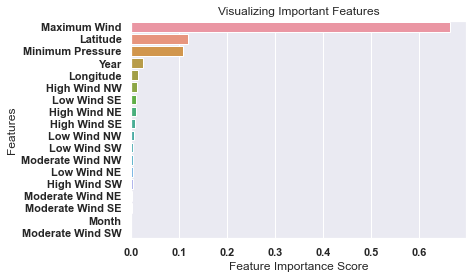

In [162]:
features = pd.Series(rf.feature_importances_ , index= X_train.columns).sort_values(ascending=False)

#visualize Feature Importance 
sns.barplot(x=features, y=features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<h2>Retrain KNN with top 5 features </h2>

In [163]:
X =  df[features.index[:5]]
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

knn=KNeighborsClassifier()

knn=knn.fit(X_train_sc,y_train)

y_predictions=knn.predict(X_test_sc)

#what to expect from the model
print("Cross Validation Score:", cross_val_score(knn,X_train_sc,y_train,cv=10).mean())

print('train score:' ,knn.score(X_train_sc,y_train))
print('test score:' ,knn.score(X_test_sc,y_test))

# Model Accuracy, how often is the classifier correct?
print('Accuracy:' ,metrics.accuracy_score(y_true = y_test, y_pred = y_predictions))


Cross Validation Score: 0.9086498961768248
train score: 0.945965827398268
test score: 0.90962888665998
Accuracy: 0.90962888665998


<span style="color:red"> KNN with 5 features behave better than the original KNN with all the features:

<span style="color:blue">KNN needs all points to be close along every axis in the data space. And each new axis added, by adding a new dimension, makes it harder and harder for two specific points to be close to each other in every axis.

<h2> Retrain Decision Tree with top 5 features</h2>

In [164]:
X =  df[features.index[:5]]
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

Status_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
Status_classifier=Status_classifier.fit(X_train_sc, y_train)

y_predictions = Status_classifier.predict(X_test_sc)

print("Cross Validation Score:", cross_val_score(Status_classifier,X_train_sc,y_train,cv=10).mean())

print('train score:' ,Status_classifier.score(X_train_sc,y_train))
print('test score:' ,Status_classifier.score(X_test_sc,y_test))

print('Accuracy:' ,metrics.accuracy_score(y_true = y_test, y_pred = y_predictions))

#Accuracy score is lower than the original Decision Tree model 

Cross Validation Score: 0.904069320559225
train score: 0.9068779884308021
test score: 0.9014042126379137
Accuracy: 0.9014042126379137


<h2> BONUS Choosing a K value for KNN</h2>

In [165]:
X =  df.drop(columns = ['Name' , 'Date','Time','Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

#knn=KNeighborsClassifier()
#knn=knn.fit(X_train_sc,y_train)
#y_predictions=knn.predict(X_test_sc)

In [166]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

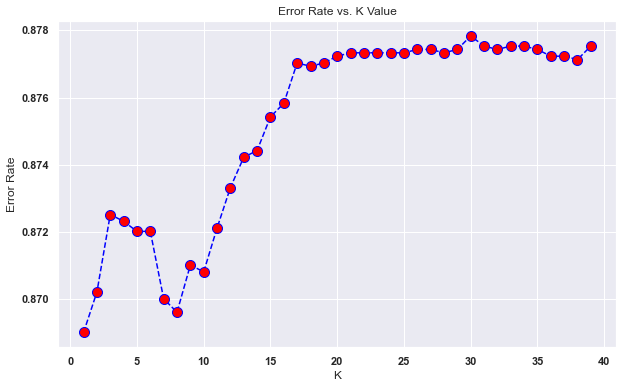

In [167]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')